In [3]:
import numpy as np
import pandas as pd
import scipy
import imageio
import math
import phylo

from PIL import Image
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
plt.style.use("seaborn-whitegrid")

In [2]:
%load_ext blackcellmagic

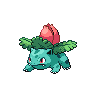

In [29]:
ivy_im = phylo.load_img("../images/ivysaur.png")
ivy_vec = phylo.vectorize(ivy_im)
ivy_im
# known_creatures = []
# phylo.unvectorize(known_creatures[0])

In [50]:
np.random.seed(42)
AF = 20
AT = 1
at_list = [ivy_vec]
af_list = [phylo.generate_random() for i in range(AF)]
X = np.array(af_list + at_list)
y = np.array([False for i in range(AF)] + [True for i in range(AT)])
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y)
print("Mean Accuracy = {0:.3f}".format(clf.score(X, y)))
print(clf.classes_)
clf.coef_

Mean Accuracy = 1.000
[False  True]


array([[-0.00068604, -0.00037921, -0.00038605, ..., -0.00065881,
        -0.00058768, -0.00061147]])

In [44]:
cands = clf.predict_proba([phylo.generate_random() for i in range(100)])

In [45]:
cands[0:4]

array([[9.99976699e-01, 2.33006664e-05],
       [9.99977441e-01, 2.25591612e-05],
       [9.99974811e-01, 2.51894208e-05],
       [9.99974515e-01, 2.54852570e-05]])

In [56]:
w = clf.coef_[0]
max(w), np.argmax(w)

(0.0008239469681768706, 4960)

In [57]:
w[np.argmax(w)]

0.0008239469681768706

In [62]:
print("x = {}, y = {}".format(np.argmax(w) % phylo.M, math.floor(np.argmax(w) / phylo.M)))

x = 64, y = 51


In [64]:
ivy_vec.mean(), af_list[0].mean()

(0.5246310763888888, 1.9918619791666667)

In [69]:
max_runs = 100000
r = 0
while r < max_runs:
    r += 1
    rv = phylo.generate_random()
    if rv.mean() <= 1.0:
        break
r, rv

(100000, array([2, 4, 0, ..., 0, 4, 4]))

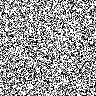

In [70]:
phylo.unvectorize(rv)

In [98]:
curr = np.zeros(phylo.M**2)
range_size = phylo.M*phylo.M*(phylo.Q+1)
i_range = list(range(range_size))
metric = []
for i in i_range:
    comp = math.ceil(i / (phylo.M * (phylo.Q+1)))
    quan = i % (phylo.Q+1)
    curr[comp] = quan
    ct = 0
    for x in curr:
        if x > 0:
            ct += 1
    m = float(ct) / len(curr)
    metric.append(m)
curr

array([0., 0., 0., ..., 0., 0., 0.])

In [99]:
mdf = pd.DataFrame()
mdf["i"] = pd.Series(i_range)
mdf["metric"] = pd.Series(metric)
mdf.head(3)

,i,metric
0,0,0.000000
1,1,0.000109
2,2,0.000109


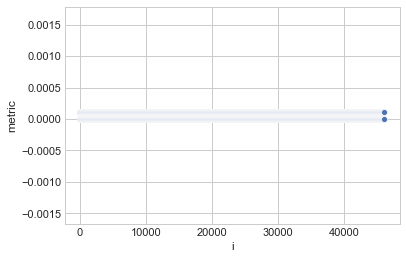

In [100]:
sns.scatterplot(x="i", y="metric", data=mdf)